In [37]:
# import library and read dataset

import pandas as pd 

df_reviews = pd.read_csv('IMDB%20Dataset.csv')

In [38]:
# take a sample of 10000 rows to make processing faster and get imbalance

# df_reviews[df_reviews['sentiment'] == 'positive'][:9000]

# 9000 positives

df_positive = df_reviews[df_reviews['sentiment'] == 'positive'][:9000]


# 1000 negatives
df_negative = df_reviews[df_reviews['sentiment'] == 'negative'][:1000]



In [39]:
df_reviews_imb = pd.concat([df_positive, df_negative])

In [40]:
df_reviews_imb.value_counts('sentiment')

sentiment
positive    9000
negative    1000
Name: count, dtype: int64

### 2 Dealing with Imbalanced Classes

### 

<Axes: xlabel='sentiment'>

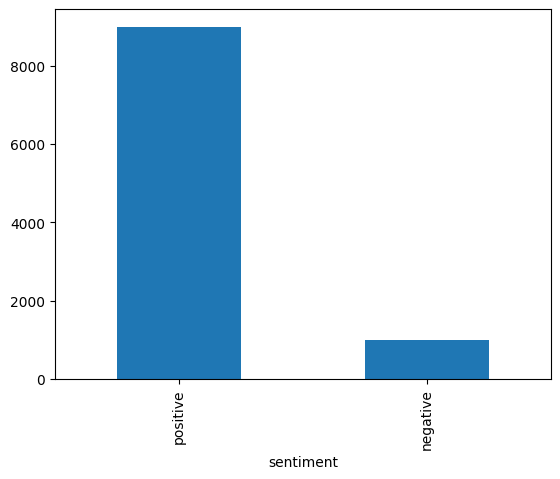

In [41]:
# make a barplot to show how data is distributed
df_reviews_imb.value_counts('sentiment').plot(kind='bar')

#### 2.1 Balancing data with .sample()

In [42]:
len_negative = len(df_reviews_imb[df_reviews_imb['sentiment'] == 'negative'])

In [43]:
df_reviews_positive = df_reviews_imb[df_reviews_imb['sentiment'] == 'positive'].sample(n=len_negative)

In [44]:
df_reviews_negative = df_reviews_imb[df_reviews_imb['sentiment'] == 'negative']

In [45]:
df_reviews_bal = pd.concat([df_reviews_positive, df_reviews_negative])

In [46]:
df_reviews_bal

,review,sentiment
14196,Nostalgia isn't always the best reason to watc...,positive
2044,Leland follows the story of Leland P. Fitzgera...,positive
15110,"This film is superb, it has the same low-budge...",positive
5407,I loved this movie! Chris Showerman did an ama...,positive
2064,This show was Fabulous. It was intricate and w...,positive
...,...,...
2000,Stranded in Space (1972) MST3K version - a ver...,negative
2005,"I happened to catch this supposed ""horror"" fli...",negative
2007,waste of 1h45 this nasty little film is one to...,negative
2010,Warning: This could spoil your movie. Watch it...,negative


In [47]:
df_reviews_bal.reset_index(drop=True, inplace=True)

In [48]:
df_reviews_bal

,review,sentiment
0,Nostalgia isn't always the best reason to watc...,positive
1,Leland follows the story of Leland P. Fitzgera...,positive
2,"This film is superb, it has the same low-budge...",positive
3,I loved this movie! Chris Showerman did an ama...,positive
4,This show was Fabulous. It was intricate and w...,positive
...,...,...
1995,Stranded in Space (1972) MST3K version - a ver...,negative
1996,"I happened to catch this supposed ""horror"" fli...",negative
1997,waste of 1h45 this nasty little film is one to...,negative
1998,Warning: This could spoil your movie. Watch it...,negative


#### 2.2 Balancing Data with RandomUnderSampler

In [49]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)



df_reviews_bal, df_reviews_bal['sentiment'] = rus.fit_resample(df_reviews_imb[['review']], df_reviews_imb['sentiment'])

In [50]:
df_reviews_bal.value_counts('sentiment')

sentiment
negative    1000
positive    1000
Name: count, dtype: int64

### 3 Splitting data into train and test

In [51]:
# import train_test_split
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_reviews_bal, test_size=0.33,
                               random_state=42)

In [52]:
# create train and test dataframes

train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

In [53]:
train_x
train_y.value_counts()

sentiment
negative    675
positive    665
Name: count, dtype: int64

### 4 Text Representation (Bag of Words)

#### 4.1 Count Vectorizer

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["I love writing code in Python. I love Python code",
        "I hate writing code in java. I hate java code"]

df = pd.DataFrame({
    'review':['review1','review2'],
    'text': text
})

cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df['text'])

In [55]:
df_dtm = pd.DataFrame(cv_matrix.toarray(), index=df['review'].values,
                      columns=cv.get_feature_names_out())

In [56]:
df_dtm

,code,hate,java,love,python,writing
review1,2,0,0,2,2,1
review2,2,2,2,0,0,1


### 4.2 Tfidf

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = ["I love writing code in Python. I love Python code",
        "I hate writing code in java. I hate java code"]

df = pd.DataFrame({
    'review':['review1','review2'],
    'text': text
})

tfidf = TfidfVectorizer(stop_words='english', norm=None)

tfidf_matrix = tfidf.fit_transform(df['text'])


In [58]:
pd.DataFrame(tfidf_matrix.toarray(), index=df['review'].values,
                      columns=tfidf.get_feature_names_out())

,code,hate,java,love,python,writing
review1,2.0,0.00000,0.00000,2.81093,2.81093,1.0
review2,2.0,2.81093,2.81093,0.00000,0.00000,1.0


#### 5 Turning our text data into numerical vectors

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

train_x_vector = tfidf.fit_transform(train_x)

In [76]:
test_x_vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 53486 stored elements and shape (660, 20625)>

In [61]:
test_x_vector = tfidf.transform(test_x)

In [62]:
test_x_vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 53486 stored elements and shape (660, 20625)>

In [63]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index = train_x.index,
                                  columns = tfidf.get_feature_names_out())

,00,000,007,01pm,02,04,08,10,100,1000,...,zooming,zooms,zues,zzzzzzzzzzzzzzzzzz,æon,élan,émigré,ísnt,ïn,ünfaithful
144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
742,0,0,0,0,0,0,0,0.042791,0,0,...,0,0,0,0,0,0,0,0,0,0
9464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 6 Model Selection

#### 6.1 Support Vector Machines (SVM)

In [64]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [69]:
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excelent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all'])))

['positive']
['positive']
['negative']


#### 6.2 Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()

dec_tree.fit(train_x_vector, train_y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 6.3 Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

,priors,None
,var_smoothing,1e-09


### 6.4 Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### 7 Model Evaluation

#### 7.1 Confusion Matrix

In [73]:
# calculate confusion matrix of svc

from sklearn.metrics import confusion_matrix

confusion_matrix(test_y,
                 svc.predict(test_x_vector),
                 labels=['positive', 'negative'])

array([[290,  45],
       [ 60, 265]])

#### 7.2 Mean Accuracy

In [ ]:
# calculate accuracy of all models

print(svc.score(test_x_vector, test_y))
print(dec_tree.score(test_x_vector, test_y))
print(gnb.score(test_x_vector.toarray(), test_y))
print(log_reg.score(test_x_vector, test_y))

# model.score(test_x_vector, test_y) 

0.8409090909090909
0.6575757575757576
0.6348484848484849
0.8303030303030303


#### 7.3 F1 Score

In [77]:
from sklearn.metrics import f1_score

f1_score(test_y, svc.predict(test_x_vector),
         labels = ['positive', 'negative'],
         average=None)

array([0.84671533, 0.83464567])

#### 7.4 Classification Report

In [79]:
from sklearn.metrics import classification_report

print(classification_report(test_y,
                      svc.predict(test_x_vector),
                      labels=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.83      0.87      0.85       335
    negative       0.85      0.82      0.83       325

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



### Tuning the Model

#### 8.1 GridSearchCv

In [81]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': [1,4,8,16,32],
              'kernel': ['linear', 'rbf']}

svc = SVC()
svc_grid = GridSearchCV(svc, parameters, cv=5)
svc_grid.fit(train_x_vector, train_y)


,estimator,SVC()
,param_grid,"{'C': [1, 4, ...], 'kernel': ['linear', 'rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [82]:
svc_grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [83]:
svc_grid.best_estimator_

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False
